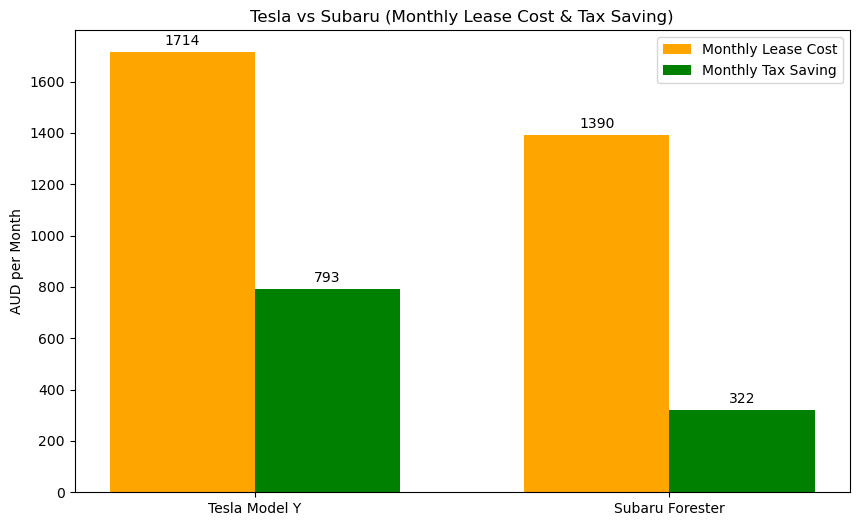

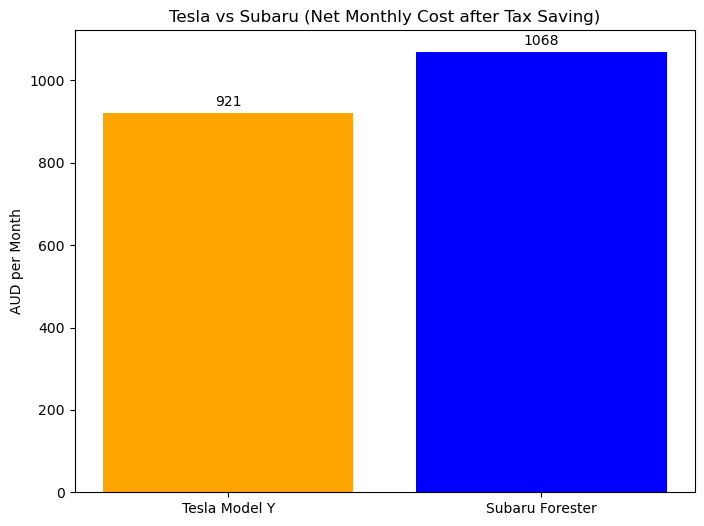

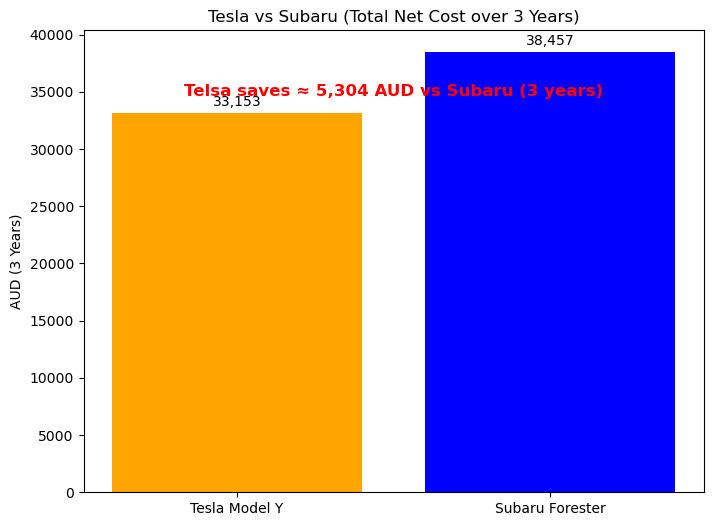

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# ==========================
# Tesla Model Y (报价单数据)
# ==========================
tesla_monthly_cost = 1713.96   # 月总成本
tesla_saving = 793.04          # 税收节省
tesla_net = tesla_monthly_cost - tesla_saving  # 实际净成本

# ==========================
# Subaru Forester (报价单数据)
# ==========================
subaru_monthly_cost = 1389.88  # 月总成本
subaru_saving = 321.62         # 税收节省
subaru_net = subaru_monthly_cost - subaru_saving  # 实际净成本

# ==========================
# 36 个月累计
# ==========================
years = 3
months = years * 12

tesla_total_net = tesla_net * months
subaru_total_net = subaru_net * months
diff = subaru_total_net - tesla_total_net   # Tesla 比 Subaru 多省多少钱

# ==========================
# 图1：月度成本 vs 节省
# ==========================
labels = ["Tesla Model Y", "Subaru Forester"]
monthly_costs = [tesla_monthly_cost, subaru_monthly_cost]
savings = [tesla_saving, subaru_saving]

x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
rects1 = ax.bar(x - width/2, monthly_costs, width, label='Monthly Lease Cost', color='orange')
rects2 = ax.bar(x + width/2, savings, width, label='Monthly Tax Saving', color='green')

ax.set_ylabel("AUD per Month")
ax.set_title("Tesla vs Subaru (Monthly Lease Cost & Tax Saving)")
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

for rect in rects1 + rects2:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0,3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# ==========================
# 图2：实际净成本 (Net Monthly Cost)
# ==========================
net_costs = [tesla_net, subaru_net]

fig, ax = plt.subplots(figsize=(8,6))
rects = ax.bar(labels, net_costs, color=['orange','blue'])

ax.set_ylabel("AUD per Month")
ax.set_title("Tesla vs Subaru (Net Monthly Cost after Tax Saving)")

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:.0f}',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0,3), textcoords="offset points",
                ha='center', va='bottom')

plt.show()

# ==========================
# 图3：三年总净成本 (Total Net Cost)
# ==========================
total_costs = [tesla_total_net, subaru_total_net]

fig, ax = plt.subplots(figsize=(8,6))
rects = ax.bar(labels, total_costs, color=['orange','blue'])

ax.set_ylabel("AUD (3 Years)")
ax.set_title("Tesla vs Subaru (Total Net Cost over 3 Years)")

for rect in rects:
    height = rect.get_height()
    ax.annotate(f'{height:,.0f}',
                xy=(rect.get_x() + rect.get_width()/2, height),
                xytext=(0,3), textcoords="offset points",
                ha='center', va='bottom')

# 在图表上加差额说明
ax.annotate(f"Telsa saves ≈ {diff:,.0f} AUD vs Subaru (3 years)",
            xy=(0.5, max(total_costs)*0.9),
            xycoords="data",
            ha="center", fontsize=12, color="red", fontweight="bold")

plt.show()


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

def lease_comparison(
    tesla_cost=1713.96, tesla_saving=793.04,
    subaru_cost=1389.88, subaru_saving=321.62,
    years=3
):
    months = years * 12
    tesla_net = tesla_cost - tesla_saving
    subaru_net = subaru_cost - subaru_saving
    tesla_total_net = tesla_net * months
    subaru_total_net = subaru_net * months
    diff = subaru_total_net - tesla_total_net

    clear_output(wait=True)
    print(f"=== 每月成本 ===")
    print(f"Tesla: 总成本 {tesla_cost:.0f}, 节省 {tesla_saving:.0f}, 净成本 {tesla_net:.0f}")
    print(f"Subaru: 总成本 {subaru_cost:.0f}, 节省 {subaru_saving:.0f}, 净成本 {subaru_net:.0f}")
    print(f"\n=== {years} 年累计净成本 ===")
    print(f"Tesla: {tesla_total_net:,.0f} AUD")
    print(f"Subaru: {subaru_total_net:,.0f} AUD")
    print(f"Tesla 节省 ≈ {diff:,.0f} AUD vs Subaru ({years} 年)")

    labels = ["Tesla Model Y", "Subaru Forester"]

    # 图1：月度 Lease 成本 vs 税收节省
    x = np.arange(len(labels))
    width = 0.35
    fig, ax = plt.subplots(figsize=(10,6))
    rects1 = ax.bar(x - width/2, [tesla_cost, subaru_cost], width, label='Monthly Lease Cost', color='orange')
    rects2 = ax.bar(x + width/2, [tesla_saving, subaru_saving], width, label='Monthly Tax Saving', color='green')
    ax.set_ylabel("AUD per Month")
    ax.set_title("Tesla vs Subaru (Monthly Lease Cost & Tax Saving)")
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()
    for rect in rects1 + rects2:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}', xy=(rect.get_x()+rect.get_width()/2, height),
                    xytext=(0,3), textcoords="offset points", ha='center', va='bottom')
    plt.show()

    # 图2：净月成本
    fig, ax = plt.subplots(figsize=(8,6))
    rects = ax.bar(labels, [tesla_net, subaru_net], color=['orange','blue'])
    ax.set_ylabel("AUD per Month")
    ax.set_title("Tesla vs Subaru (Net Monthly Cost)")
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.0f}', xy=(rect.get_x()+rect.get_width()/2, height),
                    xytext=(0,3), textcoords="offset points", ha='center', va='bottom')
    plt.show()

    # 图3：三年累计净成本
    fig, ax = plt.subplots(figsize=(8,6))
    rects = ax.bar(labels, [tesla_total_net, subaru_total_net], color=['orange','blue'])
    ax.set_ylabel("AUD (3 Years)")
    ax.set_title("Tesla vs Subaru (Total Net Cost)")
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:,.0f}', xy=(rect.get_x()+rect.get_width()/2, height),
                    xytext=(0,3), textcoords="offset points", ha='center', va='bottom')
    ax.annotate(f"Tesla saves ≈ {diff:,.0f} AUD vs Subaru ({years} yrs)",
                xy=(0.5, max(tesla_total_net, subaru_total_net)*0.9),
                xycoords="data", ha="center", fontsize=12, color="red", fontweight="bold")
    plt.show()


# ==========================
# 控件
# ==========================
tesla_cost_w = widgets.FloatText(value=1713.96, description="Tesla成本/月")
tesla_saving_w = widgets.FloatText(value=793.04, description="Tesla节省/月")
subaru_cost_w = widgets.FloatText(value=1389.88, description="Subaru成本/月")
subaru_saving_w = widgets.FloatText(value=321.62, description="Subaru节省/月")
years_w = widgets.IntSlider(value=3, min=1, max=5, description="Lease年限")

ui = widgets.VBox([tesla_cost_w, tesla_saving_w, subaru_cost_w, subaru_saving_w, years_w])
out = widgets.interactive_output(
    lease_comparison,
    {"tesla_cost": tesla_cost_w, "tesla_saving": tesla_saving_w,
     "subaru_cost": subaru_cost_w, "subaru_saving": subaru_saving_w,
     "years": years_w}
)

display(ui, out)


Output()